## **NAME : Akshata Kuldeep Asukar**

### **Data Science & Business Analytics Task**

### **#Task 1:Prediction using Supervised ML**

### *In this task we explore student percentage through simple linear regression, predicting scores based on study hours.

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [19]:
# Reading the data
data = pd.read_csv('Hours_Score.csv')
data

,Hours,Scores
0,2.5,22
1,5.1,48
2,3.2,28
3,8.5,76
4,3.5,31
5,1.5,21
6,9.2,89
7,5.5,61
8,8.3,82
9,2.7,26


In [61]:
df.shape

(5, 2)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     5 non-null      int64  
 1   Predicted  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes


In [62]:
df.describe()

,Actual,Predicted
count,5.000000,5.000000
mean,42.600000,43.651852
std,22.255336,24.407192
min,21.000000,17.884145
25%,28.000000,27.794801
50%,31.000000,34.732261
75%,63.000000,61.491033
max,70.000000,76.357018


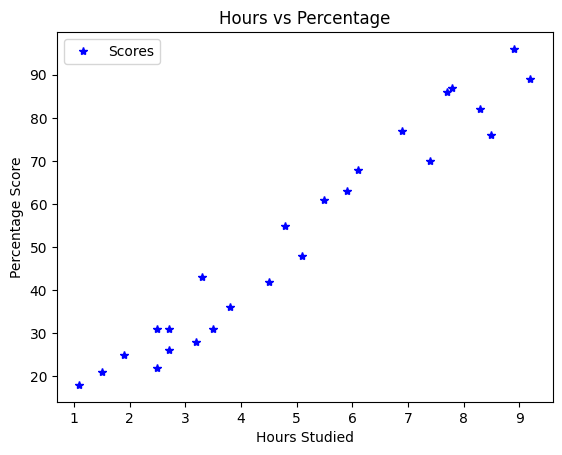

In [40]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*',color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


### **#Preparing the data**

In [60]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

array([22, 48, 28, 76, 31, 21, 89, 61, 82, 26, 86, 63, 42, 43, 18, 96, 31,
       25, 68, 70, 31, 55, 36, 77, 87], dtype=int64)

In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **#Training the linear regression model**

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Training Complete.')


Training Complete.


### **#Visualizing the training set result**

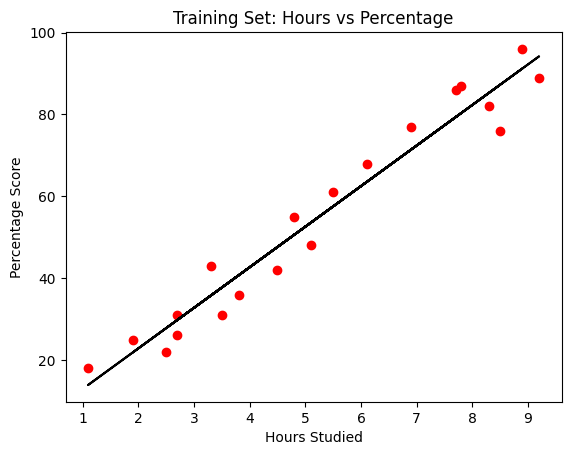

In [47]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train),color='black')
plt.title('Training Set: Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### **#Visualizing the testing set result**

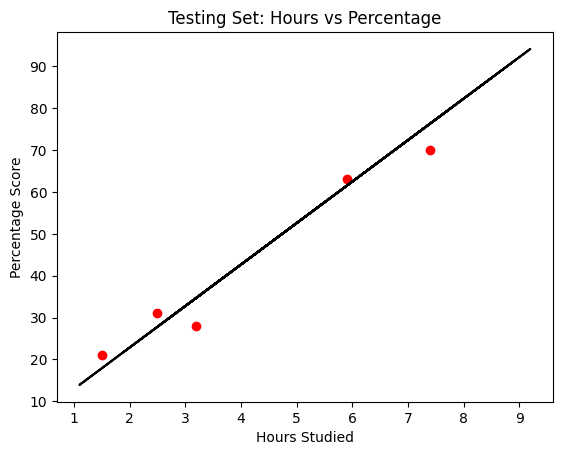

In [50]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='black')
plt.title('Testing Set: Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

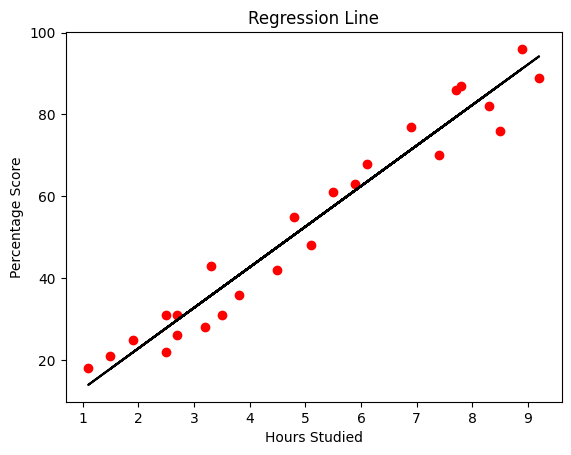

In [52]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line,color='black')
plt.title('Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [64]:
# Conclusion: From the scatter plot, we can observe a positive linear relationship between study hours and scores.
# As the number of study hours increases, the scores tend to increase as well.

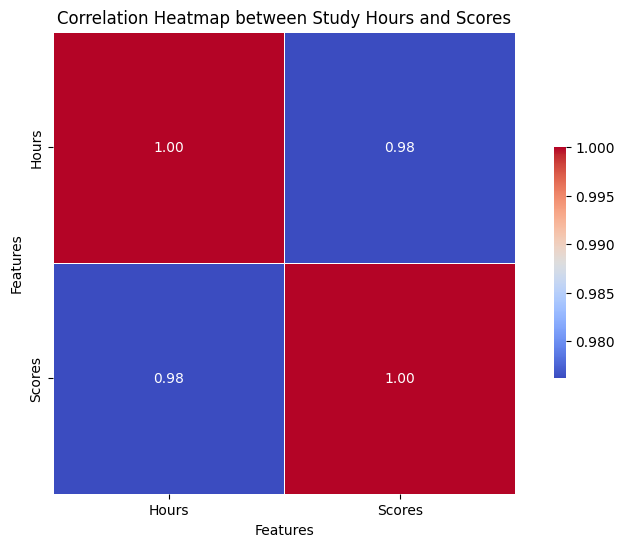

In [57]:
# checking for correlation
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap between Study Hours and Scores')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### **#Making prediction for 9.25 hrs/day**

In [14]:
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
#Comparing Actual value vs predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,21,17.884145
1,28,34.732261
2,70,76.357018
3,31,27.794801
4,63,61.491033


In [65]:
# Visualizing the comparison between actual and predicted scores using a scatter plot

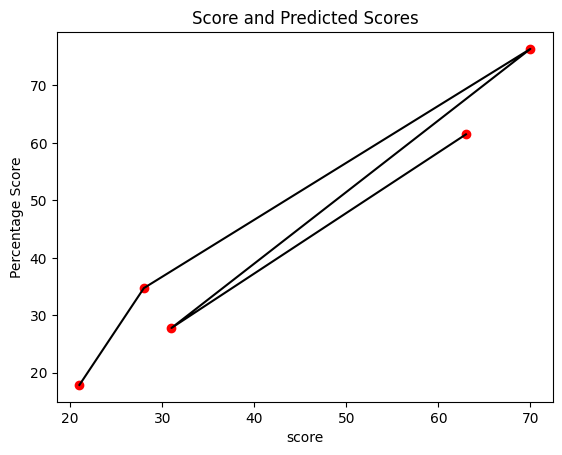

In [58]:

plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_pred,color='black')
plt.title('Score and Predicted Scores')
plt.xlabel('score')
plt.ylabel('Percentage Score')

plt.show()

In [66]:
hours = 9.25
predicted_score = regressor.predict([[hours]])
print("Predicted Score if a student studies for 9.25 hrs/day is:", predicted_score[0])

Predicted Score if a student studies for 9.25 hrs/day is: 94.69173248737535


### **#Evaluating the model**


In [17]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 21.598769307217406
R-squared Score: 0.9454906892105355
Mean Absolute Error: 4.183859899002975


### **#Conclusion:**

In [ ]:
# The high R-squared score (0.9455) suggests that the linear regression model provides a good fit to the data and can effectively predict the scores
# based on study hours.
# The relatively low values of MSE (21.60) and MAE (4.18) further support the effectiveness of the model in making accurate predictions.
# Overall, based on these evaluation metrics, we can conclude that the linear regression model performs well in predicting the scores of a student
# based on the number of study hours